In [ ]:
# Using Google Collabs
# Check the GPU
# !nvidia-smi

Thu Jun 16 11:14:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras

# **DATA EXPLORATION**

In [ ]:
cd /content/drive/MyDrive/Project_AVA/Dataset/Dataset_Clean/dataset_mixup

/content/drive/MyDrive/Project_AVA/Dataset/Dataset_Clean/dataset_mixup


In [ ]:
path_dir = 'train'

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='training',
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='validation',
    shuffle = False
)

Found 1160 images belonging to 5 classes.
Found 290 images belonging to 5 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : anoa
1 : bekantan
2 : jalak_bali
3 : komodo
4 : orang_utan


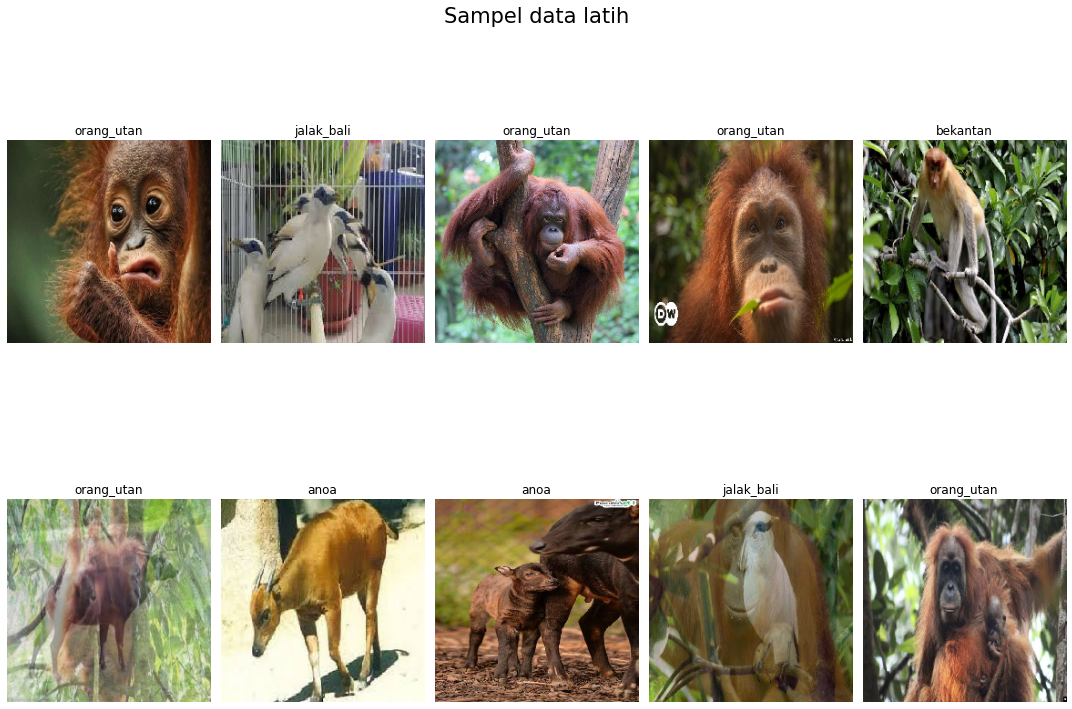

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sampel data latih", fontsize=21)
plt.show()

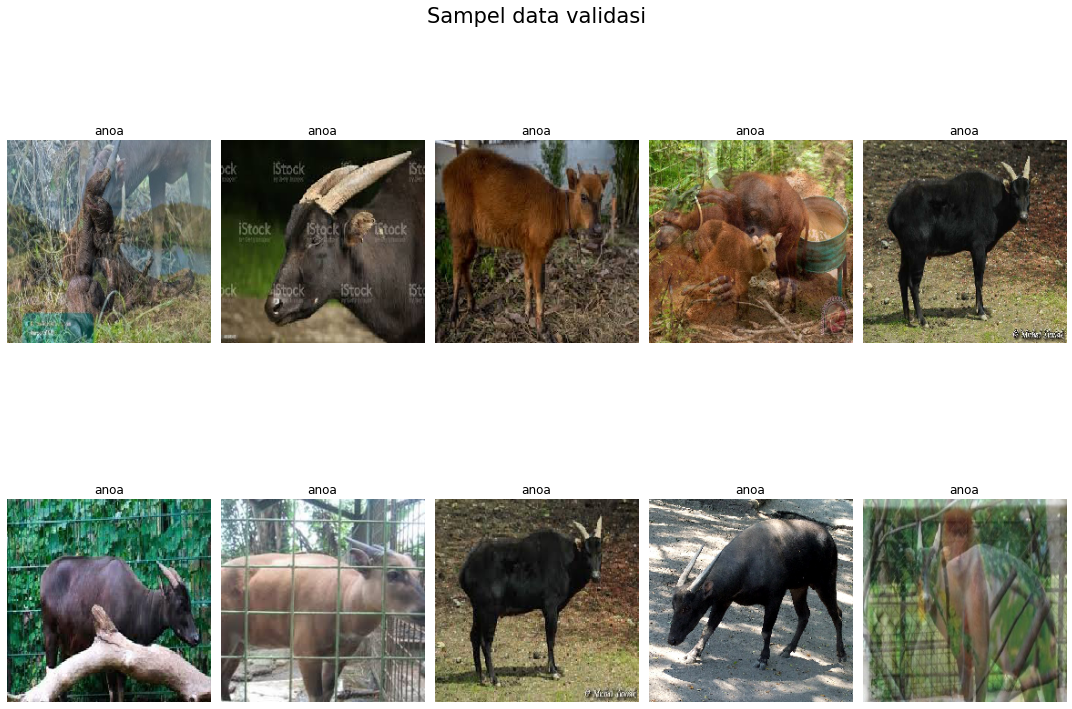

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(validation_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(validation_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sampel data validasi", fontsize=21)
plt.show()

# **AVA WITHOUT BN**


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout, BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.layers import concatenate


model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', input_shape=(224, 224, 3), activation='swish'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

#The first CNN layer followed by swish and MaxPooling layers

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

#The second convolution layer followed by swish and MaxPooling layers

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

#The third convolution layer followed by swish and MaxPooling layers

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

#The fourth convolution layer followed by swish and MaxPooling layers

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

#The fifth convolution layer followed by swish and MaxPooling layers



model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(256,activation='swish'))
#Dense layer of 256 neurons
model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53, 53, 64)       0         
 g2D)                                                 

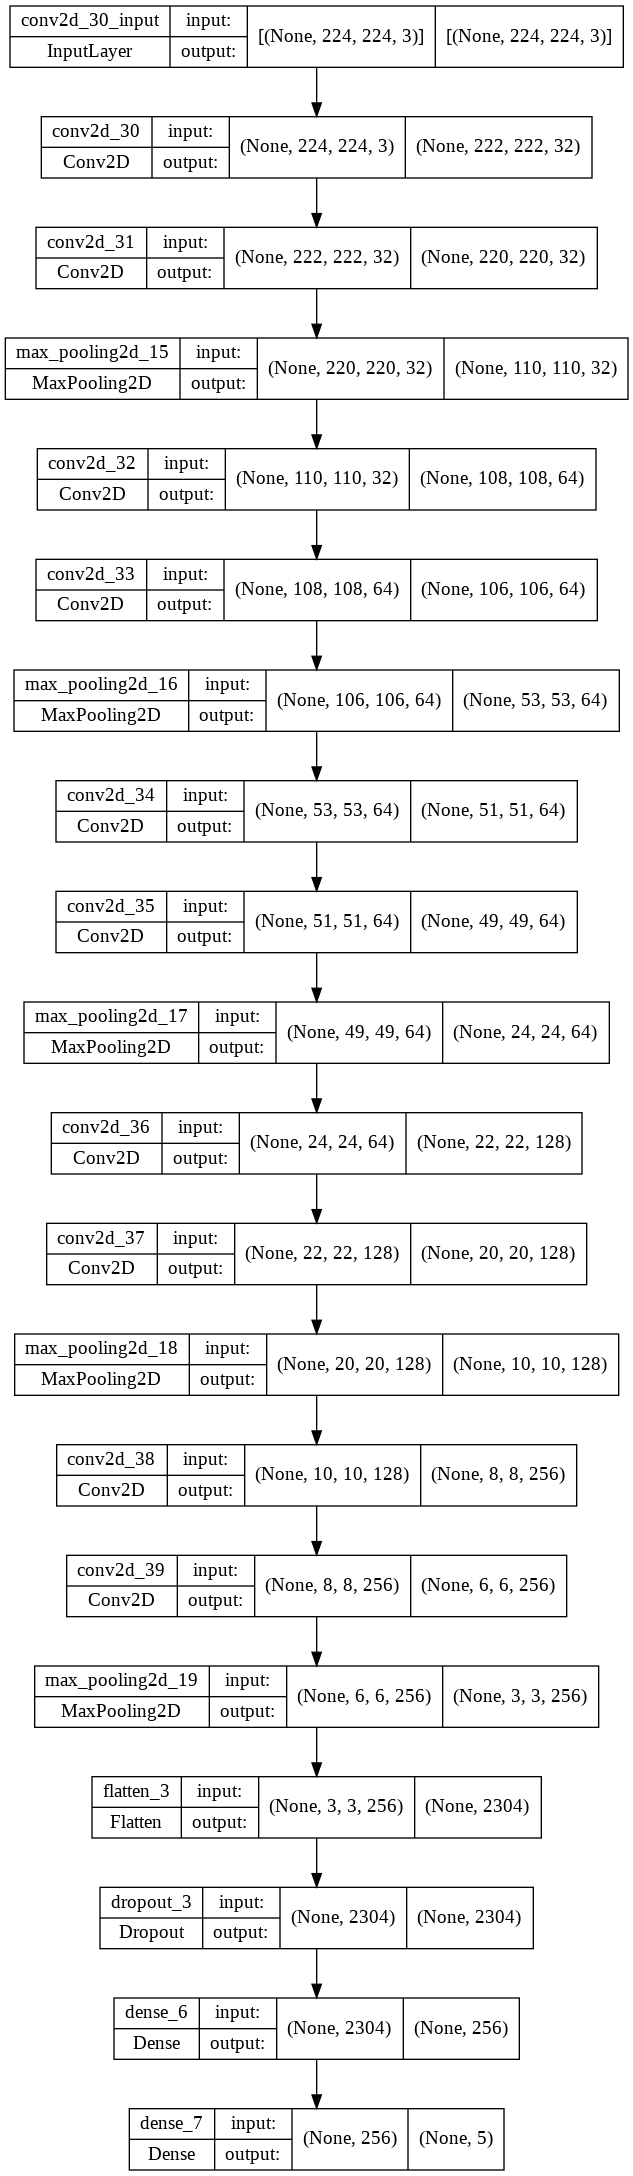

In [ ]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, to_file='CNN_model_arch.png', show_shapes=True, show_layer_names=True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
optimizer = Adam(learning_rate=0.001)

In [ ]:
%%time
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', 'Precision', 'Recall'])
history=model.fit(train_generator, batch_size=32, epochs=50, validation_data=validation_generator, verbose=1, callbacks=[reduce_lr])

Epoch 1/50
37/37 [==============================] - 600s 16s/step - loss: 1.5869 - accuracy: 0.2448 - precision: 0.6154 - recall: 0.0138 - val_loss: 1.4800 - val_accuracy: 0.3379 - val_precision: 0.9231 - val_recall: 0.0414 - lr: 0.0010
Epoch 2/50
37/37 [==============================] - 8s 220ms/step - loss: 1.4064 - accuracy: 0.3957 - precision: 0.5703 - recall: 0.1224 - val_loss: 1.2968 - val_accuracy: 0.4207 - val_precision: 0.5728 - val_recall: 0.2034 - lr: 0.0010
Epoch 3/50
37/37 [==============================] - 9s 240ms/step - loss: 1.2100 - accuracy: 0.5121 - precision: 0.6344 - recall: 0.2828 - val_loss: 1.0999 - val_accuracy: 0.5655 - val_precision: 0.6794 - val_recall: 0.3069 - lr: 0.0010
Epoch 4/50
37/37 [==============================] - 8s 223ms/step - loss: 1.0856 - accuracy: 0.5690 - precision: 0.7035 - recall: 0.3784 - val_loss: 0.9149 - val_accuracy: 0.6414 - val_precision: 0.7358 - val_recall: 0.5379 - lr: 0.0010
Epoch 5/50
37/37 [==============================] - 

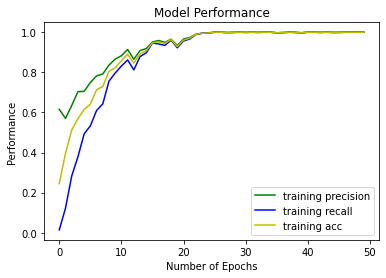

In [ ]:
# Plot the loss and accuracy curves for training 
plt.plot(history.history['precision'], color='g', label="training precision")
plt.plot(history.history['recall'], color='b', label="training recall")
plt.plot(history.history['accuracy'], color='y', label="training acc")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Performance")
plt.legend()
plt.show()

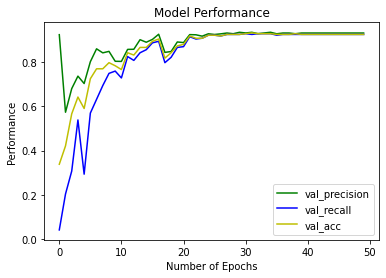

In [ ]:
# Plot the loss and accuracy curves for validation 
plt.plot(history.history['val_precision'], color='g', label="val_precision")
plt.plot(history.history['val_recall'], color='b', label="val_recall")
plt.plot(history.history['val_accuracy'], color='y', label="val_acc")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Performance")
plt.legend()
plt.show()

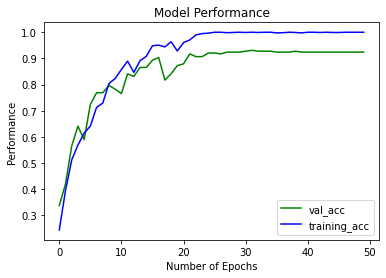

In [ ]:
# Plot the loss and accuracy curves for validation 
plt.plot(history.history['val_accuracy'], color='g', label="val_acc")
plt.plot(history.history['accuracy'], color='b', label="training_acc")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Performance")
plt.legend()
plt.show()

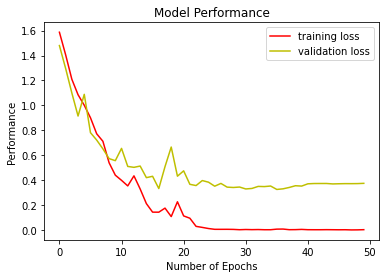

In [ ]:
# Plot the loss and accuracy curves for training
plt.plot(history.history['loss'], color='r', label="training loss")
plt.plot(history.history['val_loss'], color='y', label="validation loss")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Performance")
plt.legend()
plt.show()

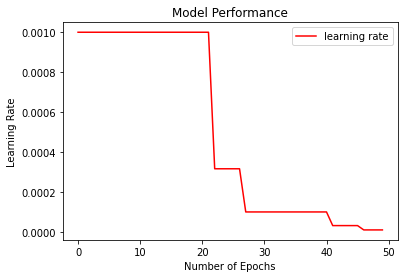

In [ ]:
# Plot the loss and accuracy curves for training
plt.plot(history.history['lr'], color='r', label="learning rate")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Learning Rate")
plt.legend()
plt.show()

In [ ]:
performance = model.evaluate(train_generator)
print('train_Performance:-', performance[1])

37/37 [==============================] - 6s 155ms/step - loss: 4.4978e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
train_Performance:- 1.0


In [ ]:
performance = model.evaluate(validation_generator)
print('Validation_Acc:-', performance[1])

10/10 [==============================] - 1s 130ms/step - loss: 0.3751 - accuracy: 0.9241 - precision: 0.9306 - recall: 0.9241
Validation_Acc:- 0.9241379499435425


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

        anoa       0.95      0.91      0.93        58
    bekantan       0.93      0.93      0.93        58
  jalak_bali       0.88      0.91      0.90        58
      komodo       0.89      0.88      0.89        58
  orang_utan       0.97      0.98      0.97        58

    accuracy                           0.92       290
   macro avg       0.92      0.92      0.92       290
weighted avg       0.92      0.92      0.92       290



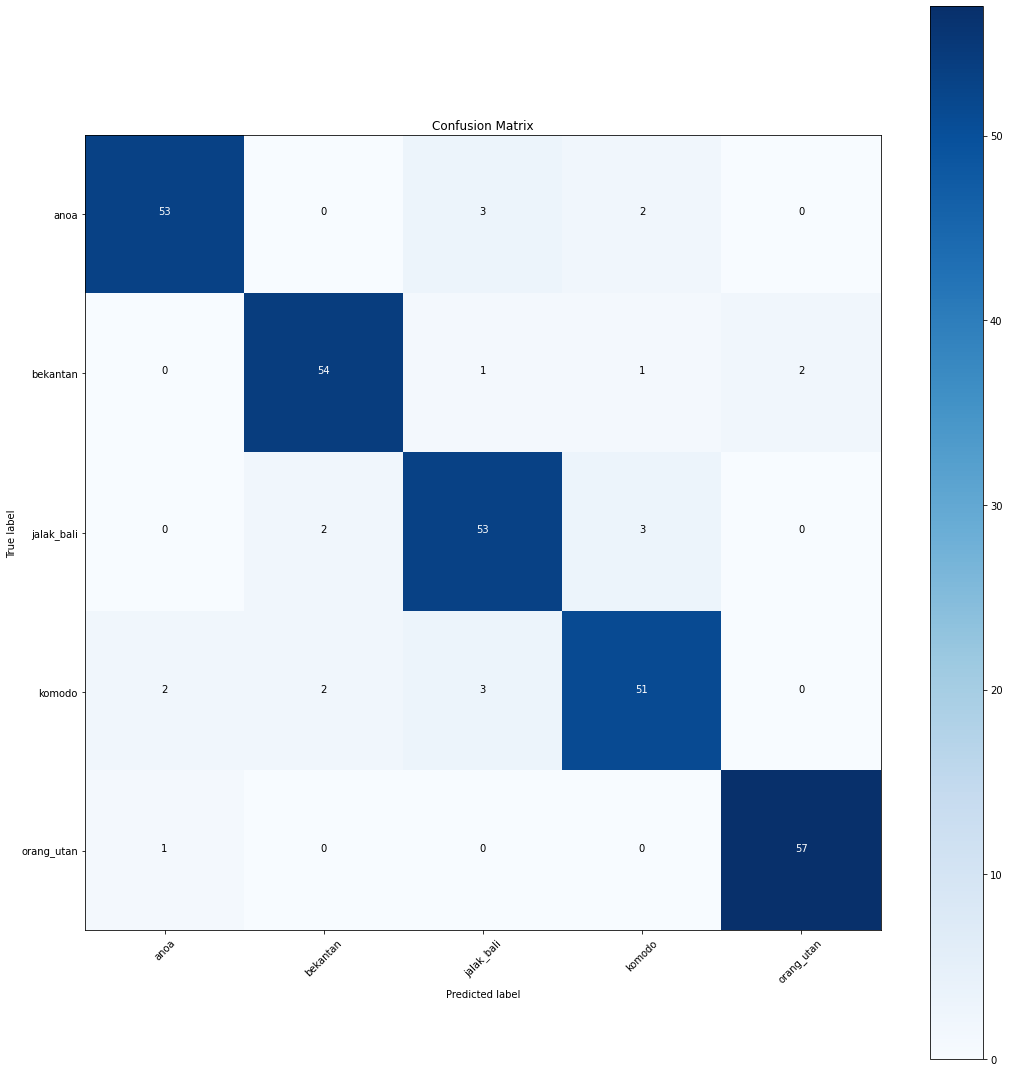

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
path_dir = 'test'

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255)
test_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='training'
)

Found 75 images belonging to 5 classes.


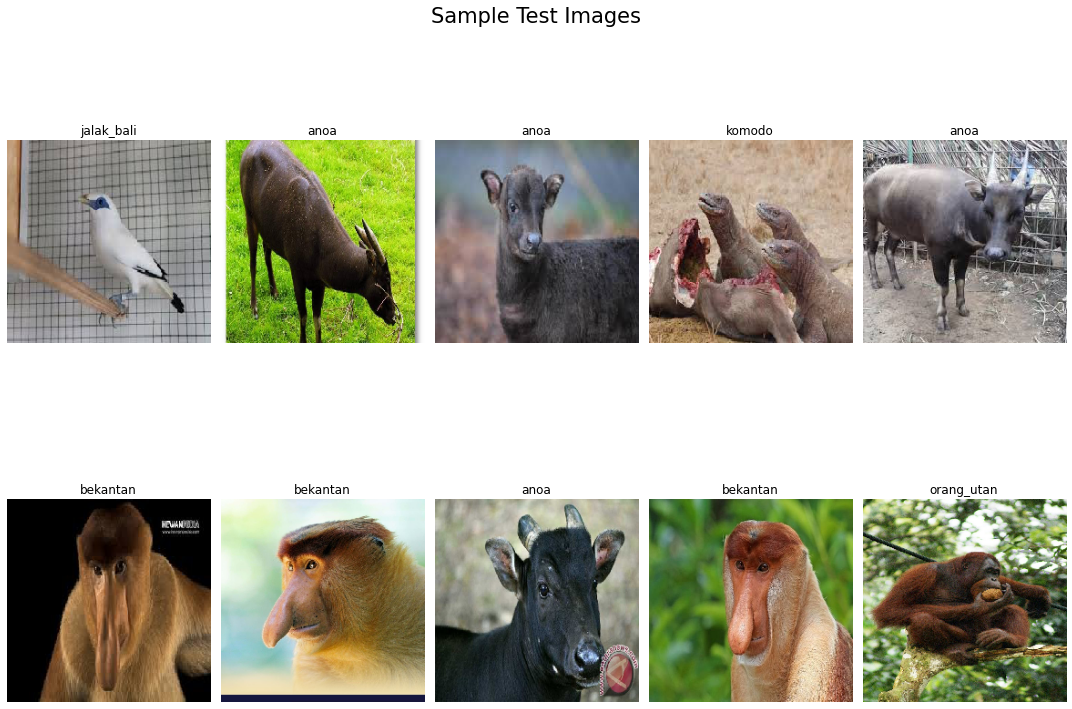

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = target_names[np.argmax(test_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(test_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Test Images", fontsize=21)
plt.show()

In [ ]:
performance = model.evaluate(test_generator)
print('Test_Acc:-', performance[1])

3/3 [==============================] - 1s 121ms/step - loss: 0.8049 - accuracy: 0.8667 - precision: 0.8667 - recall: 0.8667
Test_Acc:- 0.8666666746139526


Found 75 images belonging to 5 classes.
['anoa', 'bekantan', 'jalak_bali', 'komodo', 'orang_utan']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

        anoa       0.88      1.00      0.94        15
    bekantan       0.85      0.73      0.79        15
  jalak_bali       0.87      0.87      0.87        15
      komodo       0.88      1.00      0.94        15
  orang_utan       0.85      0.73      0.79        15

    accuracy                           0.87        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.86      0.87      0.86        75



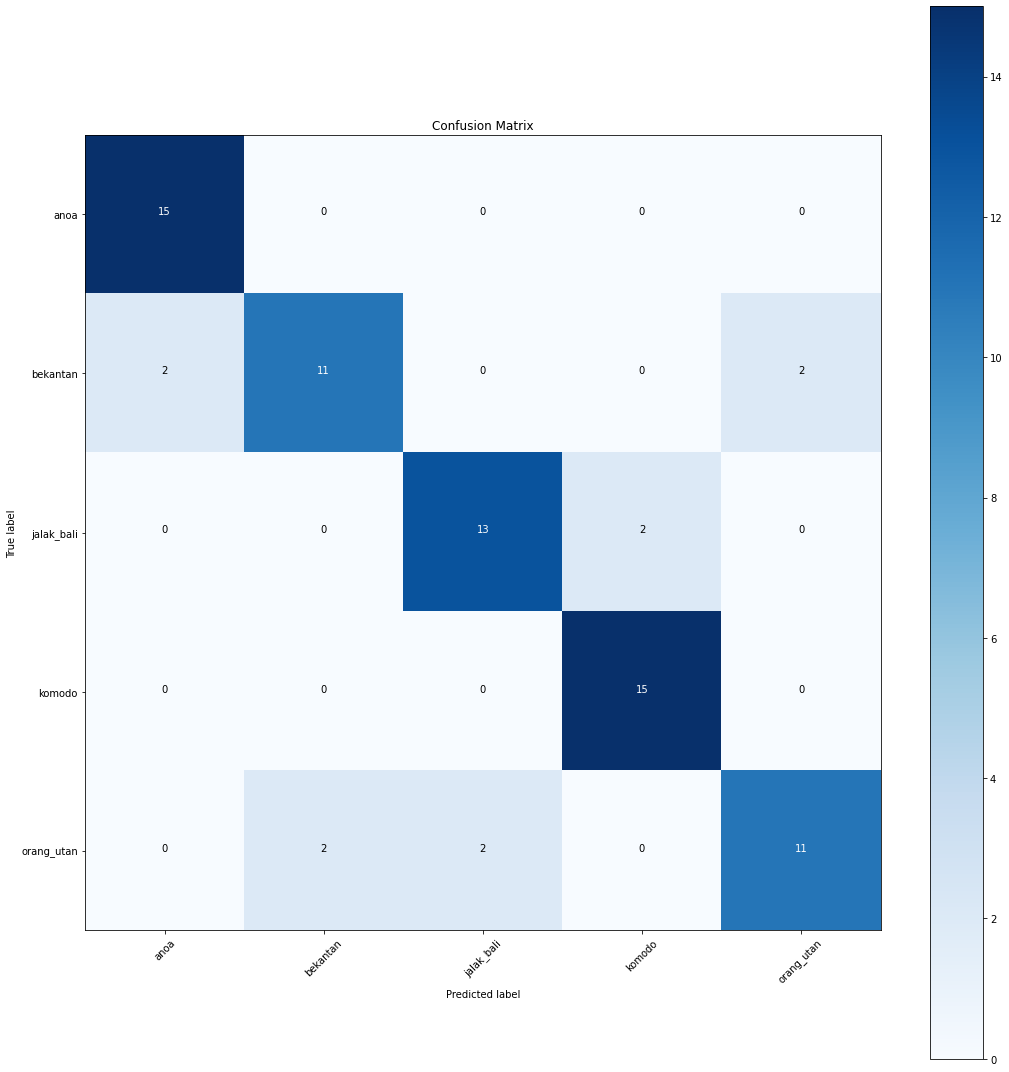

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255)
test_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='training',
    shuffle = False
)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)
#Confusion Matrix
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
model.save('/content/drive/MyDrive/Project_AVA/models/modelavamixupx.h5')

# **AVA WITH BN**


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout, BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', input_shape=(224, 224, 3), activation='swish'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid', activation='swish'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the convolutions output from convolution layer
model.add(Dense(256,activation='swish'))
#Dense layer of 256 neurons
model.add(Dense(5,activation='softmax'))
#The Final layer with 5 outputs for 5 categories


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 110, 110, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 64)     

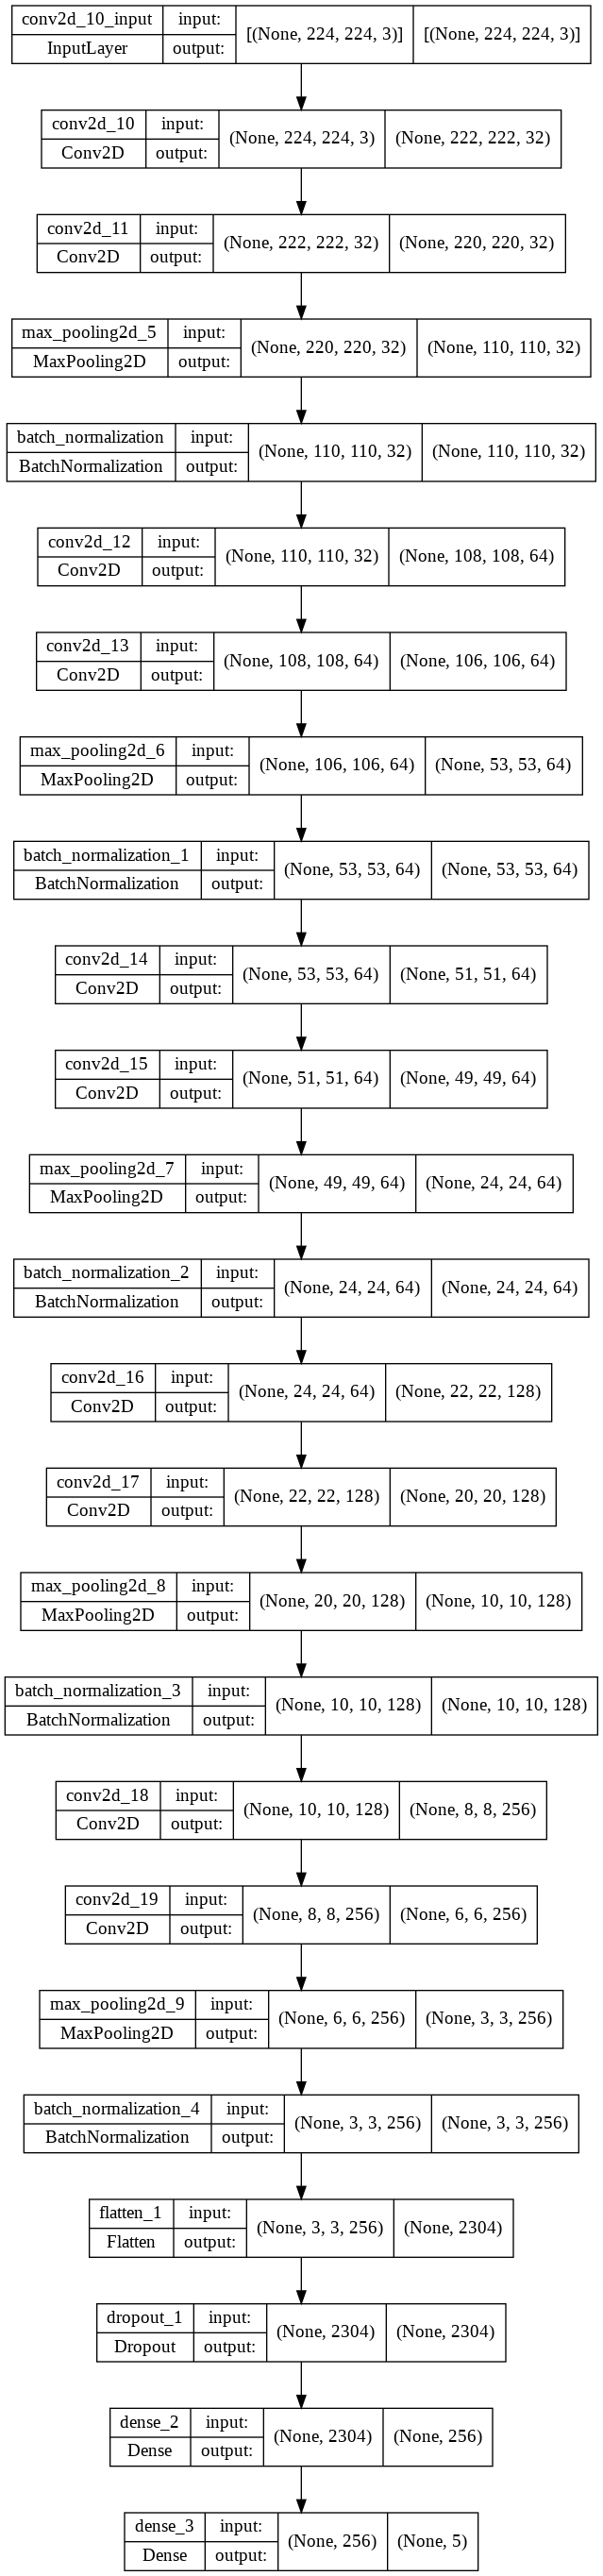

In [ ]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, to_file='CNN_model_arch.png', show_shapes=True, show_layer_names=True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
optimizer = Adam(learning_rate=0.001)

In [ ]:
%%time
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', 'Precision', 'Recall'])
history=model.fit(train_generator, batch_size=32, epochs=50, validation_data=validation_generator, verbose=1, callbacks=[reduce_lr])

NameError: ignored

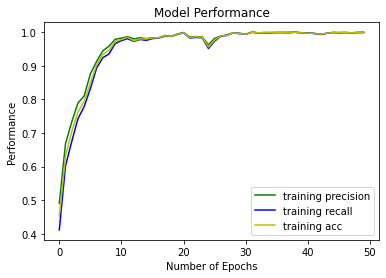

In [ ]:
# Plot the loss and accuracy curves for training 
plt.plot(history.history['precision'], color='g', label="training precision")
plt.plot(history.history['recall'], color='b', label="training recall")
plt.plot(history.history['accuracy'], color='y', label="training acc")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Performance")
plt.legend()
plt.show()

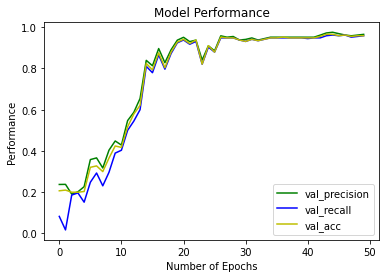

In [ ]:
# Plot the loss and accuracy curves for validation 
plt.plot(history.history['val_precision'], color='g', label="val_precision")
plt.plot(history.history['val_recall'], color='b', label="val_recall")
plt.plot(history.history['val_accuracy'], color='y', label="val_acc")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Performance")
plt.legend()
plt.show()

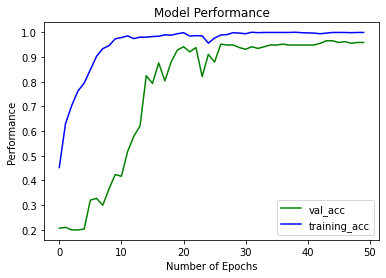

In [ ]:
# Plot the loss and accuracy curves for validation 
plt.plot(history.history['val_accuracy'], color='g', label="val_acc")
plt.plot(history.history['accuracy'], color='b', label="training_acc")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Performance")
plt.legend()
plt.show()

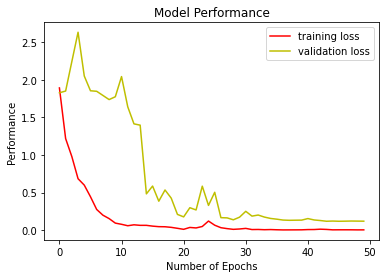

In [ ]:
# Plot the loss and accuracy curves for training
plt.plot(history.history['loss'], color='r', label="training loss")
plt.plot(history.history['val_loss'], color='y', label="validation loss")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Performance")
plt.legend()
plt.show()

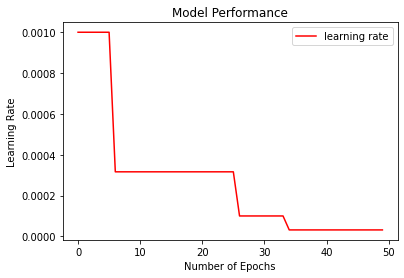

In [ ]:
# Plot the loss and accuracy curves for training
plt.plot(history.history['lr'], color='r', label="learning rate")
plt.title("Model Performance")
plt.xlabel("Number of Epochs")
plt.ylabel("Learning Rate")
plt.legend()
plt.show()

In [ ]:
performance = model.evaluate(train_generator)
print('train_Performance:-', performance[1])

37/37 [==============================] - 268s 7s/step - loss: 2.9181e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
train_Performance:- 1.0


In [ ]:
performance = model.evaluate(validation_generator)
print('Validation_Acc:-', performance[1])

10/10 [==============================] - 23s 2s/step - loss: 0.2016 - accuracy: 0.9448 - precision: 0.9446 - recall: 0.9414
Validation_Acc:- 0.9448275566101074


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

        anoa       0.89      0.97      0.93        58
    bekantan       0.95      0.98      0.97        58
  jalak_bali       0.96      0.86      0.91        58
      komodo       0.96      0.93      0.95        58
  orang_utan       0.97      0.98      0.97        58

    accuracy                           0.94       290
   macro avg       0.95      0.94      0.94       290
weighted avg       0.95      0.94      0.94       290



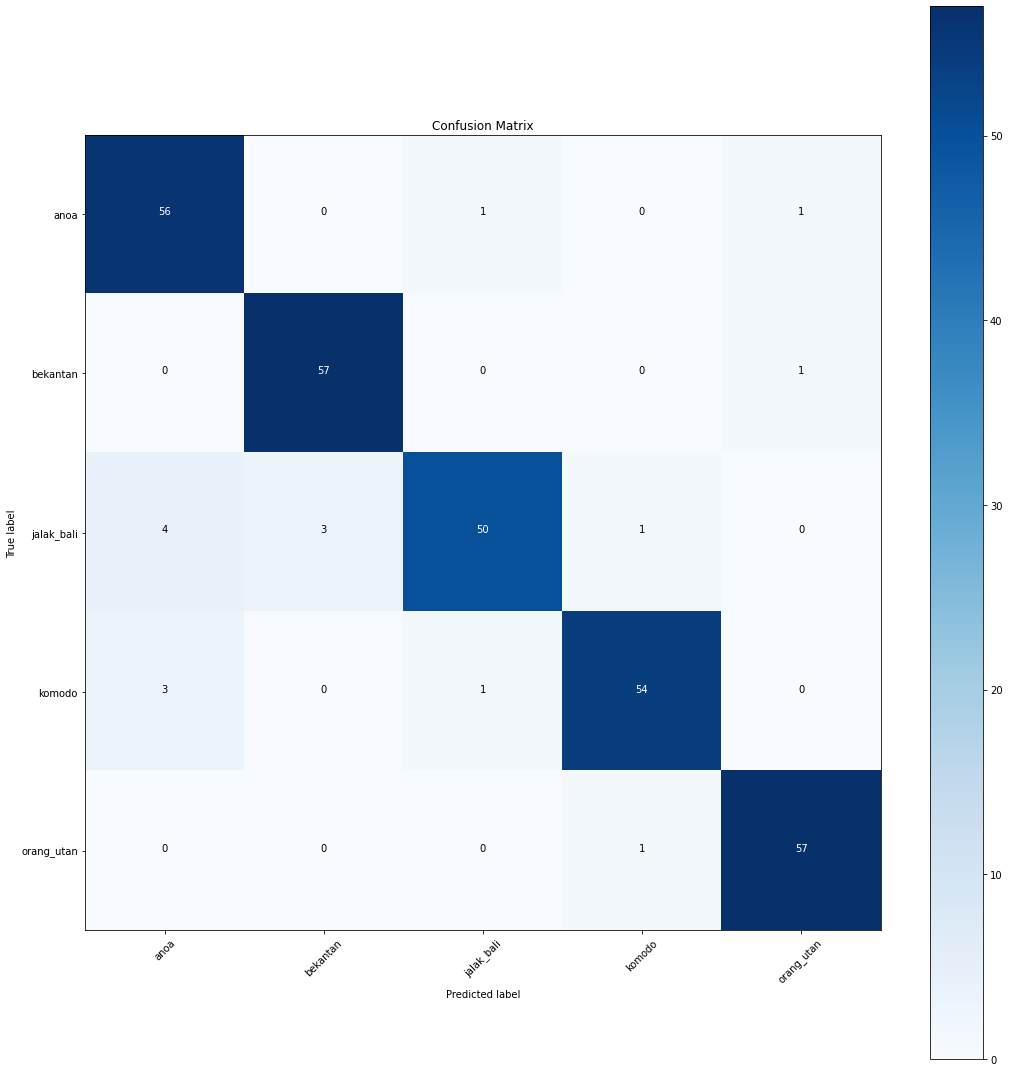

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
path_dir = 'test'

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255)
test_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='training'
    #,shuffle = False
)

Found 75 images belonging to 5 classes.


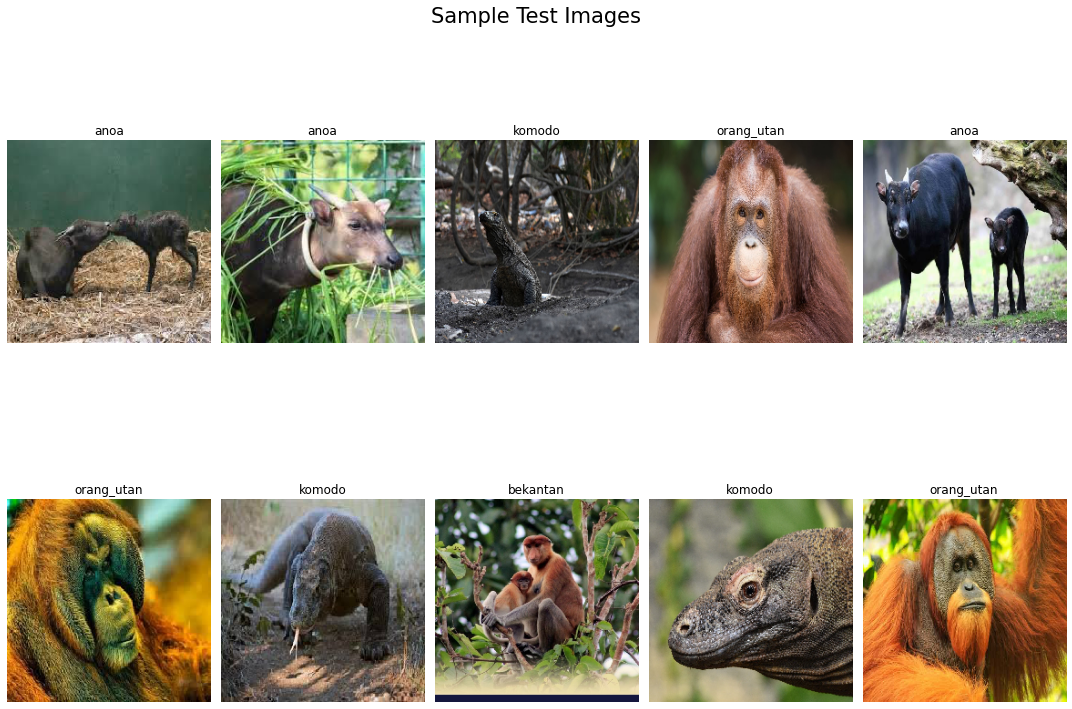

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = target_names[np.argmax(test_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(test_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Test Images", fontsize=21)
plt.show()

In [ ]:
performance = model.evaluate(test_generator)
print('Test_Acc:-', performance[1])

3/3 [==============================] - 1s 142ms/step - loss: 0.4588 - accuracy: 0.8800 - precision: 0.8784 - recall: 0.8667
Test_Acc:- 0.8799999952316284


Found 75 images belonging to 5 classes.
['anoa', 'bekantan', 'jalak_bali', 'komodo', 'orang_utan']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

        anoa       0.76      0.87      0.81        15
    bekantan       1.00      0.73      0.85        15
  jalak_bali       1.00      1.00      1.00        15
      komodo       0.83      1.00      0.91        15
  orang_utan       0.86      0.80      0.83        15

    accuracy                           0.88        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



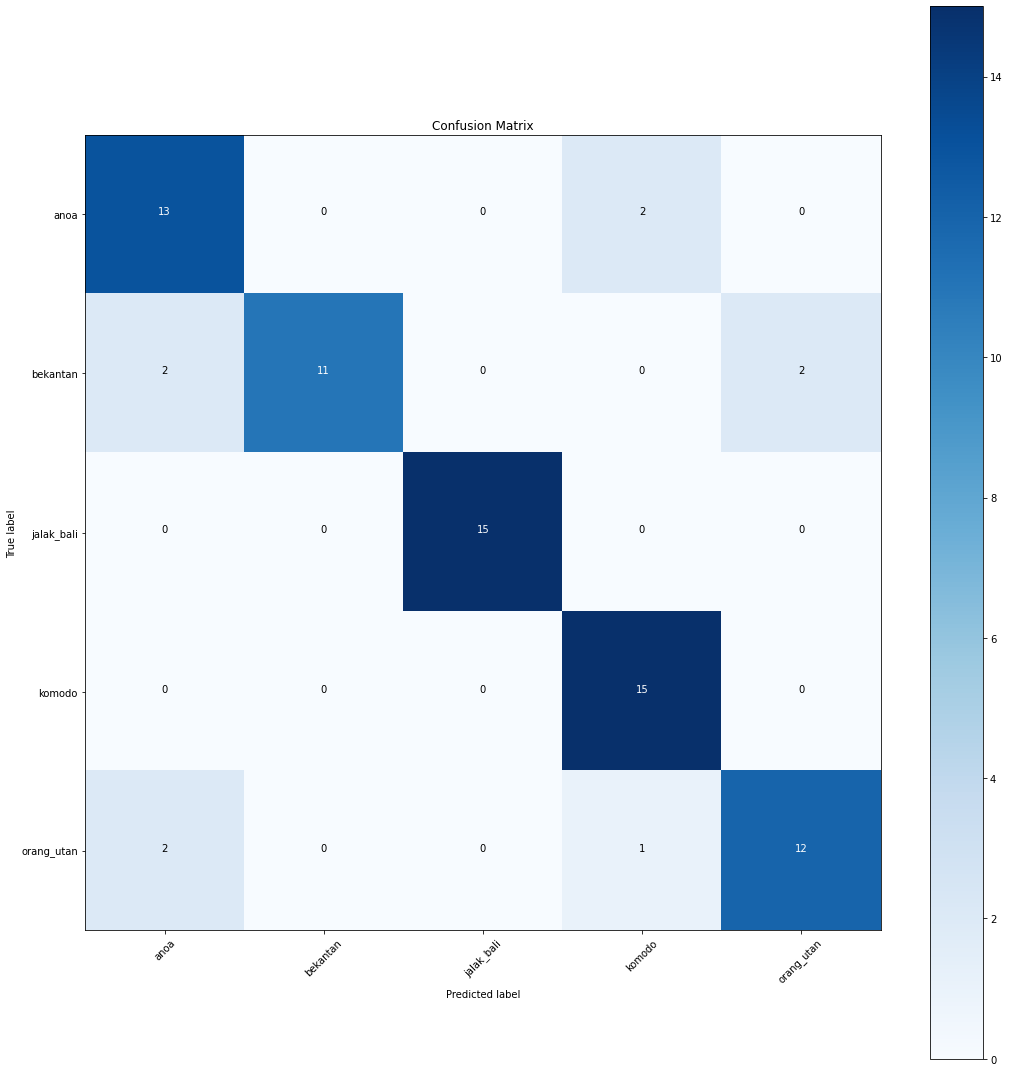

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255)
test_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='training',
    shuffle = False
)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
model.save('/content/drive/MyDrive/Project_AVA/models/modelavacutoutrelu.h5')

# **TERPAKSA**

In [ ]:
model = load_model('/content/drive/MyDrive/Project_AVA/models/modelavacutout.h5')
performance = model.evaluate(train_generator)
performance1 = model.evaluate(validation_generator)
print('Train_Acc:-', performance[1])
print('Validation_Acc:-', performance1[1])


OSError: ignored

In [ ]:
path_dir = 'test'
datagen = ImageDataGenerator(
                    rescale=1./255)
test_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='training'
    #,shuffle = False
)

performance2 = model.evaluate(test_generator)
print('Test_Acc:-', performance2[1])

# **TESTING**

In [ ]:
model = load_model('/content/drive/MyDrive/Project_AVA/models/modelavacutoutrelu.h5')
# Parameters
input_size = (224,224)

# define input shape
channel = (3,)
input_shape = input_size + channel

In [ ]:
# define target_names
target_names = ['anoa', 'bekantan', 'jalak bali', 'komodo', 'orang_utan']
model.make_predict_function()

def preprocess(img_path, input_size):
    nimg = img_path.convert('RGB').resize(input_size, resample=0)
    img_arr = (np.array(nimg))/255
    return img_arr

In [ ]:
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

def predict_label(img_path):
    i = image.load_img(img_path, target_size=(224, 224))
    x = preprocess(i, input_size)
    x = reshape([x])
    y = model.predict(x)
    return target_names[np.argmax(y)], (np.max(y*100))

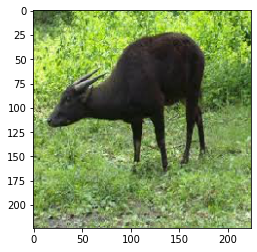


('anoa', 99.975136)


In [ ]:
img_path = "/content/drive/MyDrive/Project_AVA/Dataset/Dataset_Clean/dataset_cutout/test/anoa/anoa2.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

p = predict_label(img_path)
print("")
print(p)

In [ ]:
%%time
p = predict_label(img_path)
print(p)

('anoa', 99.995575)
CPU times: user 170 ms, sys: 2.8 ms, total: 173 ms
Wall time: 120 ms


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path = '/content/drive/MyDrive/Project_AVA/Dataset/Dataset_Clean/dataset_cutout/test/anoa'
# dimensions of images
img_width, img_height = 224, 224

# load the trained model
model = load_model('/content/drive/MyDrive/Project_AVA/models/modelavacutoutrelu.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir('/content/drive/MyDrive/Project_AVA/Dataset/Dataset_Clean/dataset_cutout/test'):
    img = os.path.join('/content/drive/MyDrive/Project_AVA/Dataset/Dataset_Clean/dataset_cutout/test', img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

IsADirectoryError: ignored

# **VGG16**

In [ ]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot 
from numpy import expand_dims


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224, 224, 3), classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.add(pretrained_model)

In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 49,279,365
Trainable params: 25,691,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
history=model.fit(train_generator, batch_size=32, epochs=100, validation_data=validation_generator)

FileNotFoundError: ignored

In [ ]:
model.save('modelavaresnet50.h5')

# **CutMix**

In [ ]:
cd /content/drive/MyDrive/Project_AVA/Dataset/Dataset_Clean/dataset_cutmix #cutmix
path_dir = 'train'

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(224,224),
    subset='validation'
)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(16,(3,3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The third convolution layer followed by relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The fourth convolution layer followed by relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The fourth convolution layer followed by relu and MaxPooling layers



model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(256,activation='relu'))
#Dense layer of 256 neurons
model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
history=model.fit(train_generator, batch_size=32, epochs=100)

In [ ]:
# Import turtle package
import turtle
  
# Creating a turtle object(pen)
pen = turtle.Turtle()
  
# Defining a method to draw curve
def curve():
    for i in range(200):
  
        # Defining step by step curve motion
        pen.right(1)
        pen.forward(1)
  
# Defining method to draw a full heart
def heart():
  
    # Set the fill color to red
    pen.fillcolor('red')
  
    # Start filling the color
    pen.begin_fill()
  
    # Draw the left line
    pen.left(140)
    pen.forward(113)
  
    # Draw the left curve
    curve()
    pen.left(120)
  
    # Draw the right curve
    curve()
  
    # Draw the right line
    pen.forward(112)
  
    # Ending the filling of the color
    pen.end_fill()
  
# Defining method to write text
def txt():
  
    # Move turtle to air
    pen.up()
  
    # Move turtle to a given position
    pen.setpos(-68, 95)
  
    # Move the turtle to the ground
    pen.down()
  
    # Set the text color to lightgreen
    pen.color('lightgreen')
  
    # Write the specified text in 
    # specified font style and size
    pen.write("GeeksForGeeks", font=(
      "Verdana", 12, "bold"))
  
  
# Draw a heart
heart()
  
# Write text
txt()
  
# To hide turtle
pen.ht()
Output: